<b>Ejercicio 0: </b>
Ejecute los programas ejemplo facilitados junto con la práctica para familiarizarse con los conceptos de los algoritmos de clustering de scikit-learn.

In [1]:
"""
=================================================
Demo of affinity propagation clustering algorithm
=================================================

Reference:
Brendan J. Frey and Delbert Dueck, "Clustering by Passing Messages
Between Data Points", Science Feb. 2007

"""
print(__doc__)

from sklearn.cluster import AffinityPropagation
from sklearn import metrics
from sklearn.datasets.samples_generator import make_blobs

# Generate sample data
centers = [[1, 1], [-1, -1], [1, -1]]
X, labels_true = make_blobs(n_samples=300, centers=centers, cluster_std=0.5,
                            random_state=0)

# Compute Affinity Propagation
af = AffinityPropagation(preference=-50).fit(X)
cluster_centers_indices = af.cluster_centers_indices_
labels = af.labels_

n_clusters_ = len(cluster_centers_indices)

print('Estimated number of clusters: %d' % n_clusters_)
print("Homogeneity: %0.3f" % metrics.homogeneity_score(labels_true, labels))
print("Completeness: %0.3f" % metrics.completeness_score(labels_true, labels))
print("V-measure: %0.3f" % metrics.v_measure_score(labels_true, labels))
print("Adjusted Rand Index: %0.3f"
      % metrics.adjusted_rand_score(labels_true, labels))
print("Adjusted Mutual Information: %0.3f"
      % metrics.adjusted_mutual_info_score(labels_true, labels,
                                           average_method='arithmetic'))
print("Silhouette Coefficient: %0.3f"
      % metrics.silhouette_score(X, labels, metric='sqeuclidean'))

# Plot result
import matplotlib.pyplot as plt
from itertools import cycle

plt.close('all')
plt.figure(1)
plt.clf()

colors = cycle('bgrcmykbgrcmykbgrcmykbgrcmyk')
for k, col in zip(range(n_clusters_), colors):
    class_members = labels == k
    cluster_center = X[cluster_centers_indices[k]]
    plt.plot(X[class_members, 0], X[class_members, 1], col + '.')
    plt.plot(cluster_center[0], cluster_center[1], 'o', markerfacecolor=col,
             markeredgecolor='k', markersize=14)
    for x in X[class_members]:
        plt.plot([cluster_center[0], x[0]], [cluster_center[1], x[1]], col)

plt.title('Estimated number of clusters: %d' % n_clusters_)
plt.show()



Demo of affinity propagation clustering algorithm

Reference:
Brendan J. Frey and Delbert Dueck, "Clustering by Passing Messages
Between Data Points", Science Feb. 2007


Estimated number of clusters: 3
Homogeneity: 0.872
Completeness: 0.872
V-measure: 0.872
Adjusted Rand Index: 0.912
Adjusted Mutual Information: 0.871
Silhouette Coefficient: 0.753


<Figure size 640x480 with 1 Axes>


K-means Clustering

The plots display firstly what a K-means algorithm would yield
using three clusters. It is then shown what the effect of a bad
initialization is on the classification process:
By setting n_init to only 1 (default is 10), the amount of
times that the algorithm will be run with different centroid
seeds is reduced.
The next plot displays what using eight clusters would deliver
and finally the ground truth.




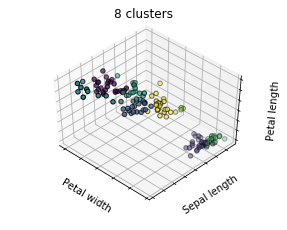

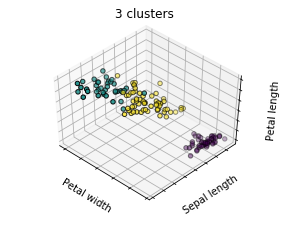

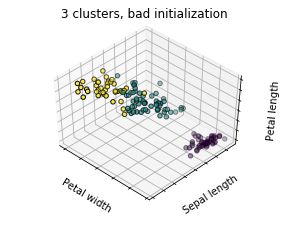

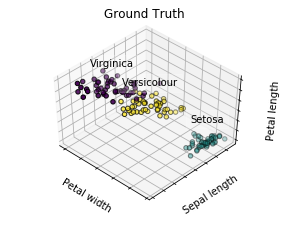

In [2]:
"""
=========================================================
K-means Clustering
=========================================================

The plots display firstly what a K-means algorithm would yield
using three clusters. It is then shown what the effect of a bad
initialization is on the classification process:
By setting n_init to only 1 (default is 10), the amount of
times that the algorithm will be run with different centroid
seeds is reduced.
The next plot displays what using eight clusters would deliver
and finally the ground truth.

"""
print(__doc__)


# Code source: Gaël Varoquaux
# Modified for documentation by Jaques Grobler
# License: BSD 3 clause

import numpy as np
import matplotlib.pyplot as plt
# Though the following import is not directly being used, it is required
# for 3D projection to work
from mpl_toolkits.mplot3d import Axes3D

from sklearn.cluster import KMeans
from sklearn import datasets

np.random.seed(5)

iris = datasets.load_iris()
X = iris.data
y = iris.target

estimators = [('k_means_iris_8', KMeans(n_clusters=8)),
              ('k_means_iris_3', KMeans(n_clusters=3)),
              ('k_means_iris_bad_init', KMeans(n_clusters=3, n_init=1,
                                               init='random'))]

fignum = 1
titles = ['8 clusters', '3 clusters', '3 clusters, bad initialization']
for name, est in estimators:
    fig = plt.figure(fignum, figsize=(4, 3))
    ax = Axes3D(fig, rect=[0, 0, .95, 1], elev=48, azim=134)
    est.fit(X)
    labels = est.labels_

    ax.scatter(X[:, 3], X[:, 0], X[:, 2],
               c=labels.astype(np.float), edgecolor='k')

    ax.w_xaxis.set_ticklabels([])
    ax.w_yaxis.set_ticklabels([])
    ax.w_zaxis.set_ticklabels([])
    ax.set_xlabel('Petal width')
    ax.set_ylabel('Sepal length')
    ax.set_zlabel('Petal length')
    ax.set_title(titles[fignum - 1])
    ax.dist = 12
    fignum = fignum + 1

# Plot the ground truth
fig = plt.figure(fignum, figsize=(4, 3))
ax = Axes3D(fig, rect=[0, 0, .95, 1], elev=48, azim=134)

for name, label in [('Setosa', 0),
                    ('Versicolour', 1),
                    ('Virginica', 2)]:
    ax.text3D(X[y == label, 3].mean(),
              X[y == label, 0].mean(),
              X[y == label, 2].mean() + 2, name,
              horizontalalignment='center',
              bbox=dict(alpha=.2, edgecolor='w', facecolor='w'))
# Reorder the labels to have colors matching the cluster results
y = np.choose(y, [1, 2, 0]).astype(np.float)
ax.scatter(X[:, 3], X[:, 0], X[:, 2], c=y, edgecolor='k')

ax.w_xaxis.set_ticklabels([])
ax.w_yaxis.set_ticklabels([])
ax.w_zaxis.set_ticklabels([])
ax.set_xlabel('Petal width')
ax.set_ylabel('Sepal length')
ax.set_zlabel('Petal length')
ax.set_title('Ground Truth')
ax.dist = 12

plt.show()



Demo of DBSCAN clustering algorithm

Finds core samples of high density and expands clusters from them.


Estimated number of clusters: 3
Estimated number of noise points: 18
Homogeneity: 0.953
Completeness: 0.883
V-measure: 0.917
Adjusted Rand Index: 0.952
Adjusted Mutual Information: 0.916
Silhouette Coefficient: 0.626


Text(0.5, 1.0, 'Estimated number of clusters: 3')

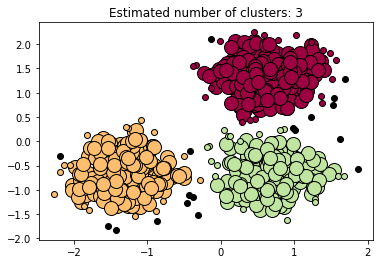

In [3]:
"""
===================================
Demo of DBSCAN clustering algorithm
===================================

Finds core samples of high density and expands clusters from them.

"""
print(__doc__)

import numpy as np

from sklearn.cluster import DBSCAN
from sklearn import metrics
from sklearn.datasets.samples_generator import make_blobs
from sklearn.preprocessing import StandardScaler

# Generate sample data
centers = [[1, 1], [-1, -1], [1, -1]]
X, labels_true = make_blobs(n_samples=750, centers=centers, cluster_std=0.4,
                            random_state=0)

X = StandardScaler().fit_transform(X)

# Compute DBSCAN
db = DBSCAN(eps=0.3, min_samples=10).fit(X)
core_samples_mask = np.zeros_like(db.labels_, dtype=bool)
core_samples_mask[db.core_sample_indices_] = True
labels = db.labels_

# Number of clusters in labels, ignoring noise if present.
n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)
n_noise_ = list(labels).count(-1)

print('Estimated number of clusters: %d' % n_clusters_)
print('Estimated number of noise points: %d' % n_noise_)
print("Homogeneity: %0.3f" % metrics.homogeneity_score(labels_true, labels))
print("Completeness: %0.3f" % metrics.completeness_score(labels_true, labels))
print("V-measure: %0.3f" % metrics.v_measure_score(labels_true, labels))
print("Adjusted Rand Index: %0.3f"
      % metrics.adjusted_rand_score(labels_true, labels))
print("Adjusted Mutual Information: %0.3f"
      % metrics.adjusted_mutual_info_score(labels_true, labels,
                                           average_method='arithmetic'))
print("Silhouette Coefficient: %0.3f"
      % metrics.silhouette_score(X, labels))

# Plot result
import matplotlib.pyplot as plt

# Black removed and is used for noise instead.
unique_labels = set(labels)
colors = [plt.cm.Spectral(each)
          for each in np.linspace(0, 1, len(unique_labels))]
for k, col in zip(unique_labels, colors):
    if k == -1:
        # Black used for noise.
        col = [0, 0, 0, 1]

    class_member_mask = (labels == k)

    xy = X[class_member_mask & core_samples_mask]
    plt.plot(xy[:, 0], xy[:, 1], 'o', markerfacecolor=tuple(col),
             markeredgecolor='k', markersize=14)

    xy = X[class_member_mask & ~core_samples_mask]
    plt.plot(xy[:, 0], xy[:, 1], 'o', markerfacecolor=tuple(col),
             markeredgecolor='k', markersize=6)

plt.title('Estimated number of clusters: %d' % n_clusters_)


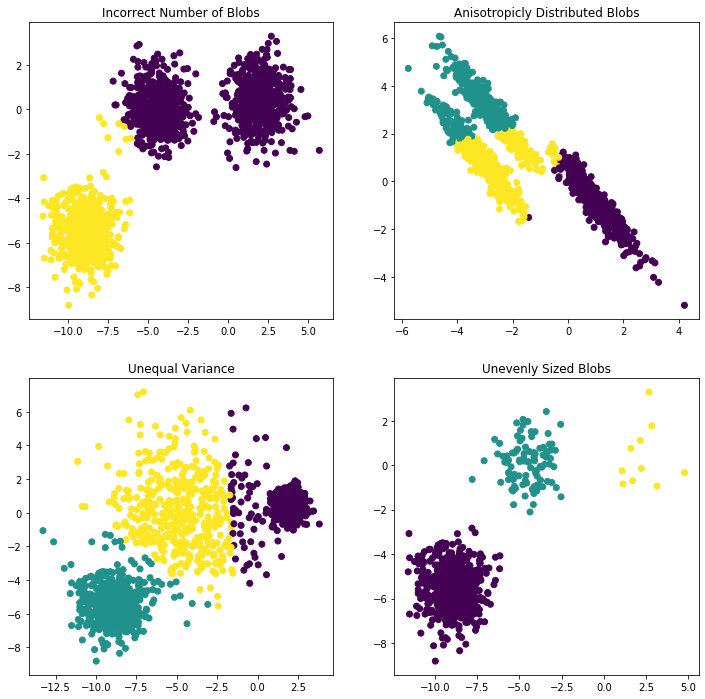

In [4]:
"""
====================================
Demonstration of k-means assumptions
====================================

This example is meant to illustrate situations where k-means will produce
unintuitive and possibly unexpected clusters. In the first three plots, the
input data does not conform to some implicit assumption that k-means makes and
undesirable clusters are produced as a result. In the last plot, k-means
returns intuitive clusters despite unevenly sized blobs.
"""
#print(__doc__)

# Author: Phil Roth <mr.phil.roth@gmail.com>
# License: BSD 3 clause

import numpy as np
import matplotlib.pyplot as plt

from sklearn.cluster import KMeans
from sklearn.datasets import make_blobs

plt.figure(figsize=(12, 12))

n_samples = 1500
random_state = 170
X, y = make_blobs(n_samples=n_samples, random_state=random_state)

# Incorrect number of clusters
y_pred = KMeans(n_clusters=2, random_state=random_state).fit_predict(X)

plt.subplot(221)
plt.scatter(X[:, 0], X[:, 1], c=y_pred)
plt.title("Incorrect Number of Blobs")

# Anisotropicly distributed data
transformation = [[0.60834549, -0.63667341], [-0.40887718, 0.85253229]]
X_aniso = np.dot(X, transformation)
y_pred = KMeans(n_clusters=3, random_state=random_state).fit_predict(X_aniso)

plt.subplot(222)
plt.scatter(X_aniso[:, 0], X_aniso[:, 1], c=y_pred)
plt.title("Anisotropicly Distributed Blobs")

# Different variance
X_varied, y_varied = make_blobs(n_samples=n_samples,
                                cluster_std=[1.0, 2.5, 0.5],
                                random_state=random_state)
y_pred = KMeans(n_clusters=3, random_state=random_state).fit_predict(X_varied)

plt.subplot(223)
plt.scatter(X_varied[:, 0], X_varied[:, 1], c=y_pred)
plt.title("Unequal Variance")

# Unevenly sized blobs
X_filtered = np.vstack((X[y == 0][:500], X[y == 1][:100], X[y == 2][:10]))
y_pred = KMeans(n_clusters=3,
                random_state=random_state).fit_predict(X_filtered)

plt.subplot(224)
plt.scatter(X_filtered[:, 0], X_filtered[:, 1], c=y_pred)
plt.title("Unevenly Sized Blobs")

plt.show()



A demo of the mean-shift clustering algorithm

Reference:

Dorin Comaniciu and Peter Meer, "Mean Shift: A robust approach toward
feature space analysis". IEEE Transactions on Pattern Analysis and
Machine Intelligence. 2002. pp. 603-619.


number of estimated clusters : 3


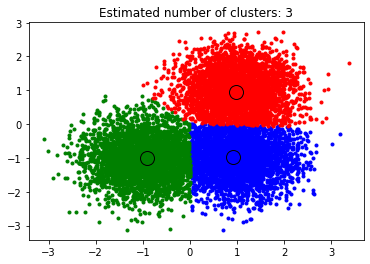

In [5]:
"""
=============================================
A demo of the mean-shift clustering algorithm
=============================================

Reference:

Dorin Comaniciu and Peter Meer, "Mean Shift: A robust approach toward
feature space analysis". IEEE Transactions on Pattern Analysis and
Machine Intelligence. 2002. pp. 603-619.

"""
print(__doc__)

import numpy as np
from sklearn.cluster import MeanShift, estimate_bandwidth
from sklearn.datasets.samples_generator import make_blobs

# #############################################################################
# Generate sample data
centers = [[1, 1], [-1, -1], [1, -1]]
X, _ = make_blobs(n_samples=10000, centers=centers, cluster_std=0.6)

# #############################################################################
# Compute clustering with MeanShift

# The following bandwidth can be automatically detected using
bandwidth = estimate_bandwidth(X, quantile=0.2, n_samples=500)

ms = MeanShift(bandwidth=bandwidth, bin_seeding=True)
ms.fit(X)
labels = ms.labels_
cluster_centers = ms.cluster_centers_

labels_unique = np.unique(labels)
n_clusters_ = len(labels_unique)

print("number of estimated clusters : %d" % n_clusters_)

# #############################################################################
# Plot result
import matplotlib.pyplot as plt
from itertools import cycle

plt.figure(1)
plt.clf()

colors = cycle('bgrcmykbgrcmykbgrcmykbgrcmyk')
for k, col in zip(range(n_clusters_), colors):
    my_members = labels == k
    cluster_center = cluster_centers[k]
    plt.plot(X[my_members, 0], X[my_members, 1], col + '.')
    plt.plot(cluster_center[0], cluster_center[1], 'o', markerfacecolor=col,
             markeredgecolor='k', markersize=14)
plt.title('Estimated number of clusters: %d' % n_clusters_)
plt.show()


Spectral clustering for image segmentation

In this example, an image with connected circles is generated and
spectral clustering is used to separate the circles.

In these settings, the :ref:`spectral_clustering` approach solves the problem
know as 'normalized graph cuts': the image is seen as a graph of
connected voxels, and the spectral clustering algorithm amounts to
choosing graph cuts defining regions while minimizing the ratio of the
gradient along the cut, and the volume of the region.

As the algorithm tries to balance the volume (ie balance the region
sizes), if we take circles with different sizes, the segmentation fails.

In addition, as there is no useful information in the intensity of the image,
or its gradient, we choose to perform the spectral clustering on a graph
that is only weakly informed by the gradient. This is close to performing
a Voronoi partition of the graph.

In addition, we use the mask of the objects to restrict the graph to the
outline of the objects. 

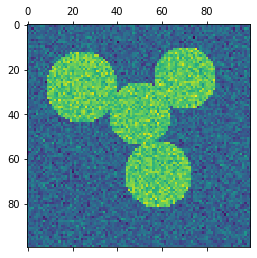

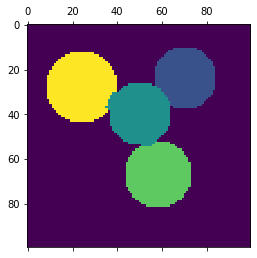

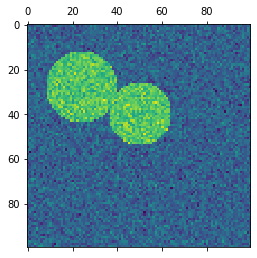

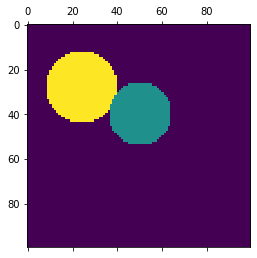

In [6]:
"""
===========================================
Spectral clustering for image segmentation
===========================================

In this example, an image with connected circles is generated and
spectral clustering is used to separate the circles.

In these settings, the :ref:`spectral_clustering` approach solves the problem
know as 'normalized graph cuts': the image is seen as a graph of
connected voxels, and the spectral clustering algorithm amounts to
choosing graph cuts defining regions while minimizing the ratio of the
gradient along the cut, and the volume of the region.

As the algorithm tries to balance the volume (ie balance the region
sizes), if we take circles with different sizes, the segmentation fails.

In addition, as there is no useful information in the intensity of the image,
or its gradient, we choose to perform the spectral clustering on a graph
that is only weakly informed by the gradient. This is close to performing
a Voronoi partition of the graph.

In addition, we use the mask of the objects to restrict the graph to the
outline of the objects. In this example, we are interested in
separating the objects one from the other, and not from the background.
"""
print(__doc__)

# Authors:  Emmanuelle Gouillart <emmanuelle.gouillart@normalesup.org>
#           Gael Varoquaux <gael.varoquaux@normalesup.org>
# License: BSD 3 clause

import numpy as np
import matplotlib.pyplot as plt

from sklearn.feature_extraction import image
from sklearn.cluster import spectral_clustering

l = 100
x, y = np.indices((l, l))

center1 = (28, 24)
center2 = (40, 50)
center3 = (67, 58)
center4 = (24, 70)

radius1, radius2, radius3, radius4 = 16, 14, 15, 14

circle1 = (x - center1[0]) ** 2 + (y - center1[1]) ** 2 < radius1 ** 2
circle2 = (x - center2[0]) ** 2 + (y - center2[1]) ** 2 < radius2 ** 2
circle3 = (x - center3[0]) ** 2 + (y - center3[1]) ** 2 < radius3 ** 2
circle4 = (x - center4[0]) ** 2 + (y - center4[1]) ** 2 < radius4 ** 2

# #############################################################################
# 4 circles
img = circle1 + circle2 + circle3 + circle4

# We use a mask that limits to the foreground: the problem that we are
# interested in here is not separating the objects from the background,
# but separating them one from the other.
mask = img.astype(bool)

img = img.astype(float)
img += 1 + 0.2 * np.random.randn(*img.shape)

# Convert the image into a graph with the value of the gradient on the
# edges.
graph = image.img_to_graph(img, mask=mask)

# Take a decreasing function of the gradient: we take it weakly
# dependent from the gradient the segmentation is close to a voronoi
graph.data = np.exp(-graph.data / graph.data.std())

# Force the solver to be arpack, since amg is numerically
# unstable on this example
labels = spectral_clustering(graph, n_clusters=4, eigen_solver='arpack')
label_im = np.full(mask.shape, -1.)
label_im[mask] = labels

plt.matshow(img)
plt.matshow(label_im)

# #############################################################################
# 2 circles
img = circle1 + circle2
mask = img.astype(bool)
img = img.astype(float)

img += 1 + 0.2 * np.random.randn(*img.shape)

graph = image.img_to_graph(img, mask=mask)
graph.data = np.exp(-graph.data / graph.data.std())

labels = spectral_clustering(graph, n_clusters=2, eigen_solver='arpack')
label_im = np.full(mask.shape, -1.)
label_im[mask] = labels

plt.matshow(img)
plt.matshow(label_im)

plt.show()

<b>Ejercicio 1 y 2: </b></br>
    <ul>
        <li>Seleccione al menos cinco problemas de los disponibles en lo repositorios usados en las prácticas anteriores. Use
problemas que solo contengan atributos numéricos. No olvide eliminar la información de la clase antes de
ejecutar los algoritmos.
        <li>Seleccione el algoritmo de clustering k-means
    </ul>

In [36]:
from scipy.io import arff
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
import pandas as pd
from os import listdir
from sklearn.svm import LinearSVC
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.gaussian_process.kernels import RBF
from sklearn.multiclass import OutputCodeClassifier
from sklearn.metrics.cluster import homogeneity_score
from sklearn import metrics
import warnings
warnings.filterwarnings('ignore')

datasets=listdir('./datasets')

print('Clustering con K-MEANS')

for i in datasets:

    print('Base de datos: ' + str(i))
    dataset = arff.loadarff('./datasets/' + str(i))
    df = pd.DataFrame(dataset[0])
    data = df.iloc[:, df.columns != 'class']
    target = pd.factorize(df['class'])[0]
    X_train, X_test, Y_train, Y_test = train_test_split(data, target, test_size=0.4)
    
    kmeans=KMeans(n_clusters=3, random_state=0)
    results=kmeans.fit(data)
    print('Cluster resultante: ',results.labels_) # Imprimimos el Clustering realizado

Clustering con K-MEANS
Base de datos: contact-lenses.arff
Cluster resultante:  [2 2 2 2 2 2 2 2 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1]
Base de datos: diabetes.arff
Cluster resultante:  [1 1 1 0 0 1 1 1 2 1 1 1 1 2 0 1 0 1 1 0 0 1 1 1 0 0 1 0 0 1 1 0 1 1 1 0 1
 1 1 0 1 1 1 0 1 1 1 1 1 1 1 1 1 2 2 1 2 0 1 0 1 1 1 0 1 1 1 1 1 0 0 0 1 0
 1 1 1 1 1 1 1 1 1 1 1 0 1 1 0 1 1 0 1 1 1 0 1 1 1 0 1 1 1 1 1 0 1 0 1 1 0
 2 1 1 0 1 1 1 1 1 0 1 0 1 1 0 0 0 0 1 0 1 0 1 1 0 1 0 1 2 1 1 1 1 0 1 1 0
 1 1 0 1 0 2 1 1 0 0 1 0 1 0 0 1 1 0 1 1 1 1 1 0 1 1 1 0 1 0 1 1 1 0 1 1 1
 1 2 1 0 0 1 0 1 1 1 0 1 1 0 2 1 1 1 1 0 1 0 1 1 1 1 1 1 0 0 0 0 0 1 1 2 1
 1 0 1 1 1 1 2 1 1 2 1 1 1 1 0 1 1 1 1 1 1 0 0 1 1 2 2 1 1 1 1 1 0 1 1 1 2
 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 0 1 0 0 1 1 0 2 0 1 1 1 1 0 0 1 0
 2 0 0 1 1 0 1 1 1 0 0 0 0 0 1 0 0 1 1 0 1 1 0 1 0 1 1 1 1 0 0 1 0 1 1 1 1
 1 1 0 1 1 0 1 0 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 0 1 1 0 2 1 1 1 0 1 1 1 1 0
 2 0 1 0 0 2 1 1 1 1 1 1 0 1 0 1 1 1 0 1 0 1 2 1 1 0 0 1 1 1 1 1 0 1 1 

<b>Respuesta: </b></br>
Se ha pasado al clasificador KMeans los datos de cada conjunto omitiendo la clase, el problema viene al determinar el número de clústers de cada dataset, que como a priori no se conocen se ha establecido un número de cluster de 3. Esto provoca un mal resultado en la homogeniedad, a excepción de la base de datos 'iris', de la cual conocemos que tiene 3 clases.

<b>Ejercicio 3: </b></br>
Selecciones los algoritmos de clustering jerárquicos single link, complete link y average link

In [24]:
from scipy.io import arff
from sklearn.model_selection import train_test_split
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.cluster import AgglomerativeClustering
from sklearn.metrics.cluster import homogeneity_score
import warnings
warnings.filterwarnings('ignore')

datasets=listdir('./datasets')

print('Clustering con K-MEANS')
num_clusters=3
for i in datasets:

    print('Base de datos: ' + str(i))
    dataset = arff.loadarff('./datasets/' + str(i))
    df = pd.DataFrame(dataset[0])
    data = df.iloc[:, df.columns != 'class']
    
    print('Clustering con SINGLE LINK')
    single=AgglomerativeClustering(n_clusters=num_clusters, linkage='single')
    results=single.fit(data)
    print(results.labels_)

    print('Clustering con COMPLETE LINK')
    complete=AgglomerativeClustering(n_clusters=num_clusters,linkage='complete')
    results=complete.fit(data)
    print(results.labels_)

    print('Custering con AVERAGE LINK')
    average=AgglomerativeClustering(n_clusters=num_clusters, linkage='average')
    results=average.fit(data)
    print(results.labels_)
    
    print('-------------------------------------')

Clustering con K-MEANS
Base de datos: contact-lenses.arff
Clustering con SINGLE LINK
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 2 1]
Clustering con COMPLETE LINK
[2 2 2 2 2 2 2 2 1 1 1 1 1 1 1 1 0 0 0 0 0 0 0 0]
Custering con AVERAGE LINK
[2 2 2 2 2 2 2 2 1 1 1 1 1 1 1 1 0 0 0 0 0 0 0 0]
-------------------------------------
Base de datos: diabetes.arff
Clustering con SINGLE LINK
[2 2 2 2 2 2 2 2 2 2 2 2 2 1 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 0 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 0 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 

<b>Respuesta: </b></br>
Hemos utilizado un algoritmo de clustering aglomerativo con los siguientes métodos de link:
<ul>
    <li><b>Single Link: </b>Utiliza las distancias mínimas entre todas las observaciones de los dos conjuntos.
    <li><b>Complete Link: </b>Utiliza las distancias máximas entre todas las observaciones de los dos conjuntos.
    <li><b>Average Link: </b> Utiliza la media de las distancias entres todas las observaciones de los dos conjuntos.
</ul>

